# Capstone Project OECD Cancer Data and Machine Learning
## Begin Buliding Two Random Forest Regressor Models
### The First for the Aggregate Malignant Neoplasms cancer site
### The Second for individual types of cancer, excluing Malignant Neoplasms 

In [3]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
#read the csvs into dataframes

OECD_MN = pd.read_csv('OECD_MN.csv')

OECD_NOMN = pd.read_csv('OECD_NOMN.csv')


OECD_MN.describe

<bound method NDFrame.describe of            Country          Cancer site  Year  Cancer Rate
0          Austria  Malignant neoplasms  2002        275.5
1          Austria  Malignant neoplasms  2008        250.6
2          Austria  Malignant neoplasms  2012        254.1
3   United Kingdom  Malignant neoplasms  2002        273.6
4   United Kingdom  Malignant neoplasms  2008        269.4
..             ...                  ...   ...          ...
85          Norway  Malignant neoplasms  2008        297.9
86          Norway  Malignant neoplasms  2012        318.3
87          Canada  Malignant neoplasms  2002        299.9
88          Canada  Malignant neoplasms  2008        296.6
89          Canada  Malignant neoplasms  2012        295.7

[90 rows x 4 columns]>

In [5]:
OECD_NOMN.describe


<bound method NDFrame.describe of              Country                                     Cancer site  Year  \
0    Slovak Republic            Malignant neoplasms of female breast  2002   
1    Slovak Republic            Malignant neoplasms of female breast  2008   
2    Slovak Republic            Malignant neoplasms of female breast  2012   
3             Sweden            Malignant neoplasms of female breast  2002   
4             Sweden            Malignant neoplasms of female breast  2008   
..               ...                                             ...   ...   
445      New Zealand  Malignant neoplasms of trachea, bronchus, lung  2008   
446      New Zealand  Malignant neoplasms of trachea, bronchus, lung  2012   
447      Netherlands   Malignant neoplasms of colon, rectum and anus  2002   
448      Netherlands   Malignant neoplasms of colon, rectum and anus  2008   
449      Netherlands   Malignant neoplasms of colon, rectum and anus  2012   

     Cancer Rate  
0         

## Malignant Neoplasms Model

In [6]:
#Malignant Neoplasms Model
# choose relevant columns
OECD_model_mn = OECD_MN[['Country','Cancer site','Year','Cancer Rate']]

# get dummy data 
df_dum_mn = pd.get_dummies(OECD_model_mn)

# train test split 
from sklearn.model_selection import train_test_split

X = df_dum_mn.drop('Cancer Rate', axis =1)
y = df_dum_mn['Cancer Rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#train Malignant Neoplasms model
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

y_pred_mn = rf.predict(X_test)

In [8]:
#evaluate the r squared 
r2_score(y_test, y_pred_mn)

0.7701358170650696

In [9]:
#determine the mean squared error
mean_squared_error(y_test, y_pred_mn)

619.5469444444439

In [10]:
#determine the mean absolute error
mean_absolute_error(y_test, y_pred_mn)

17.971111111111103

In [11]:
#Tune Malignant Neoplasms with Gridsearch

grid_space_mn={'max_depth':[None, 10, 20, 30],'n_estimators':[500, 700, 900],'max_features':[5,7,10,15],'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,10]}

rf_cv = GridSearchCV(rf,param_grid=grid_space_mn,cv=3,scoring='neg_mean_squared_error', n_jobs = -1)
OECD_rf_cv = rf_cv.fit(X_train,y_train)

In [12]:
print('Best hyperparameters are: '+str(OECD_rf_cv.best_params_))
print('Best score is: '+str(OECD_rf_cv.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score is: -977.8410019049979


In [13]:
# Retrain model with new parameters
y_pred_mn2 = rf_cv.predict(X_test)


In [14]:
#evaluate the r squared 
r2_score(y_test, y_pred_mn2)

0.6866417012968051

In [15]:
#determine the mean squared error
mean_squared_error(y_test, y_pred_mn2)

844.5864597044712

In [16]:
#determine the mean absolute error
mean_absolute_error(y_test, y_pred_mn2)

19.488966666666713

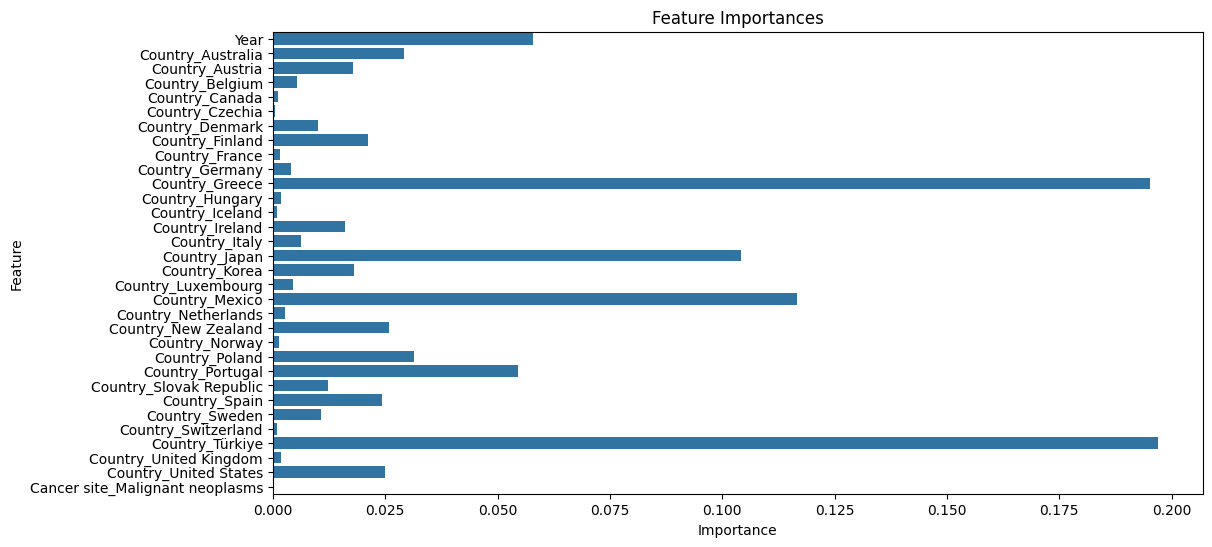

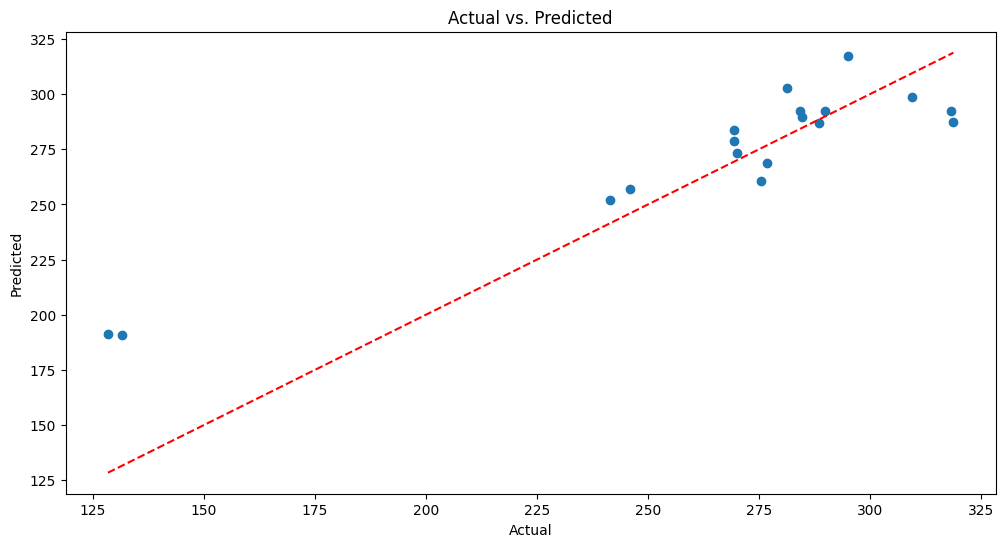

In [17]:
# Vizulise the Malignant Neoplasms Regression model 
rf.fit(X_train, y_train)

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize predictions
y_pred = rf.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Create No Malignant Neoplasms Model

In [18]:
# No Malignant Neoplasms Model
# choose relevant columns
OECD_model_nomn = OECD_NOMN[['Country','Cancer site','Year','Cancer Rate']]

# get dummy data 
df_dum_nomn = pd.get_dummies(OECD_model_nomn)

# train test split 
from sklearn.model_selection import train_test_split

X = df_dum_nomn.drop('Cancer Rate', axis =1)
y = df_dum_nomn['Cancer Rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#train the No Malignant Neoplasms model
rf_no_mn = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_no_mn.fit(X_train, y_train)

y_pred_no_mn = rf_no_mn.predict(X_test)

In [20]:
#evaluate the r squared 
r2_score(y_test, y_pred_no_mn)  

0.9238742325453319

In [21]:
#determine the mean squared error
mean_squared_error(y_test, y_pred_no_mn)

74.26181666666669

In [22]:
#determine the mean absolute error
mean_absolute_error(y_test, y_pred_no_mn)

5.884777777777779

In [23]:
#Tune No Maligant Neoplasms with Gridsearch

grid_space_no_mn={'max_depth':[None, 10, 20, 30, 40],'n_estimators':[250, 500, 700],'max_features':[7,10, 13],'min_samples_leaf':[1,2],'min_samples_split':[2,5]}

rf_nomn_cv = GridSearchCV(rf,param_grid=grid_space_mn,cv=3,scoring='neg_mean_squared_error', n_jobs = -1)
OECD_rf_nomn_cv = rf_nomn_cv.fit(X_train,y_train)

In [24]:
print('Best hyperparameters are: '+str(OECD_rf_nomn_cv.best_params_))
print('Best score is: '+str(OECD_rf_nomn_cv.best_score_))

Best hyperparameters are: {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
Best score is: -177.84948007599647


In [25]:
# Retrain model with new parameters
y_pred_nomn2 = rf_nomn_cv.predict(X_test)


In [26]:
#evaluate the r squared 
r2_score(y_test, y_pred_nomn2)

0.9031621403102157

In [27]:
#determine the mean squared error
mean_squared_error(y_test, y_pred_nomn2)

94.46677022937742

In [28]:
#determine the mean absolute error
mean_absolute_error(y_test, y_pred_nomn2)

6.475181192578598

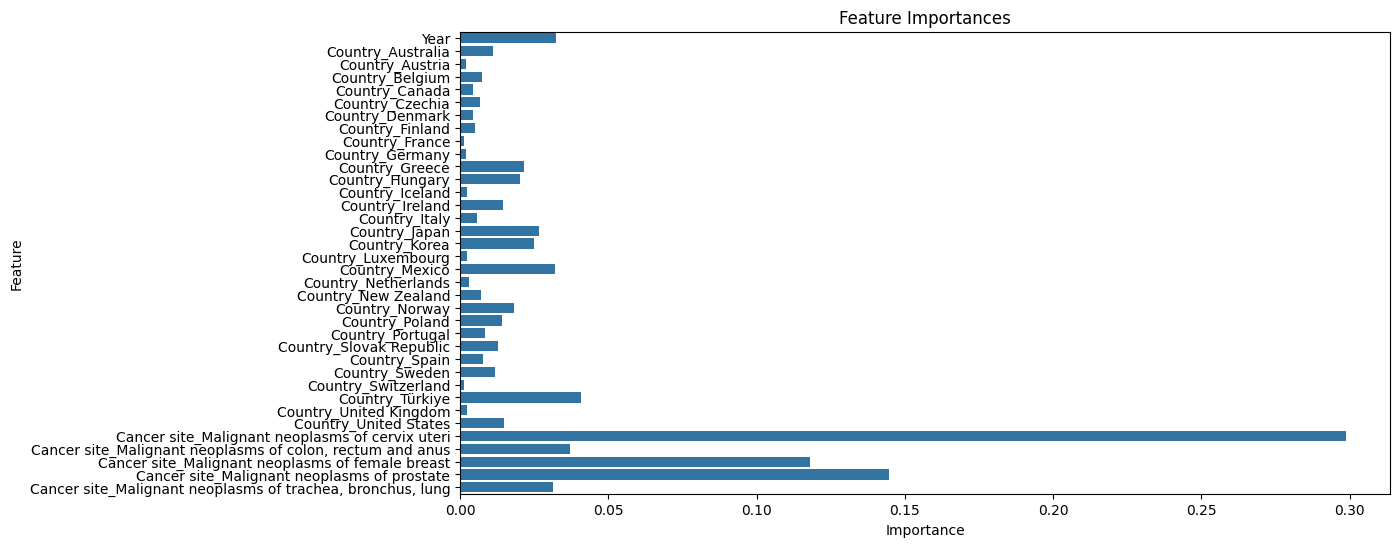

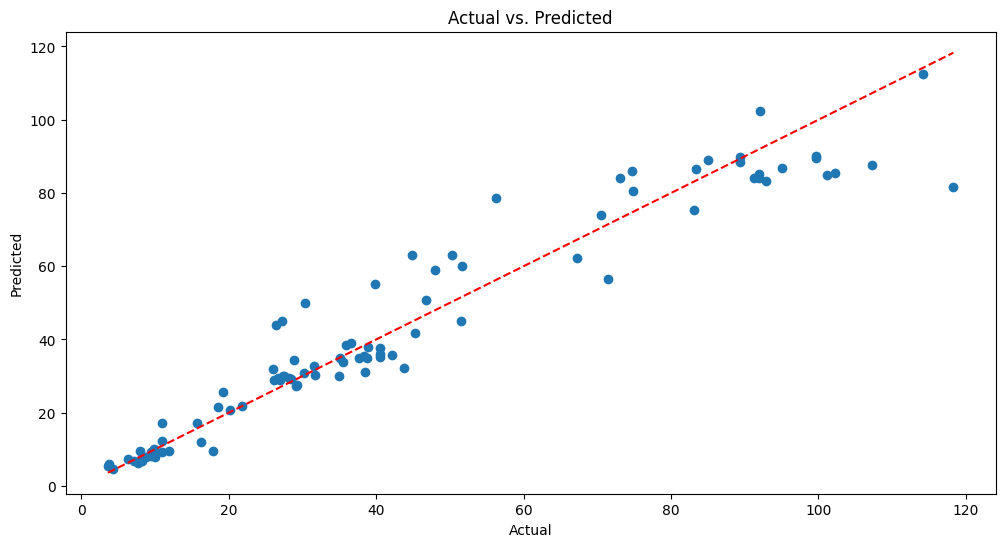

In [29]:
# Visulize the No Malignant Neoplasms Regression model 

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_no_mn.feature_importances_, y=X_train.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize predictions
y_pred = rf_no_mn.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
